# Example notebook for correlation plots (corellogram)

There are two main functions:  
Corellograms.autocorrelation_plot  
Corellograms.crosscorrelation_plot 

General cross-correlations show the correlation between two different functions through time. By lagging through the time of a series underlying patterns can be recognized by periodic behaviour. This is similar (but not equivalent) to Fourier analysis.  
Randomness in time series can be checked with autocorrelation plots. 

In [1]:
import sys
import os
sys.path.append('../python')

In [2]:
import correlograms
reload(correlograms)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print dir(correlograms)
help(correlograms)

['__all__', '__builtins__', '__doc__', '__file__', '__name__', '__package__', '__path__', '_np', '_plt', 'autocorrelation_plot', 'crosscorrelation_plot']
Help on package correlograms:

NAME
    correlograms

FILE
    /opt/KaveToolbox/pro/python/correlograms/__init__.py

DESCRIPTION
    Small library to make correlograms. Pandas contains autocorrelations, but not general cross-correlations.
    Use autocorrelation_plot and crosscorrelation_plot to make plots
    
    The formula for the implemented version of cross-correlate is found here:
    https://en.wikipedia.org/wiki/Cross-correlation#Time_series_analysis
    
    .. math::
        \ro_{XX}(\tau) = E[(X_t - \mu_X)(Y_{t+\tau} - \mu_Y)] / (\sigma_X \sigma_Y)
    
    This is the statistical method of calculating cross-correlations.
    
    Authored by: Lodewijk Nauta for KPMG, 2015-09-15

PACKAGE CONTENTS


FUNCTIONS
    autocorrelation_plot(series, ax=None, **kwds)
        Autocorrelation plot for time series.
        
        Par

The lines shown are the 95% and 99% confidence bands where the solid line is 95% confidence. These bands are based on the z-values of a normal distribution (https://en.wikipedia.org/wiki/Standard_score)

### An autocorellation_plot or autocorellogram:

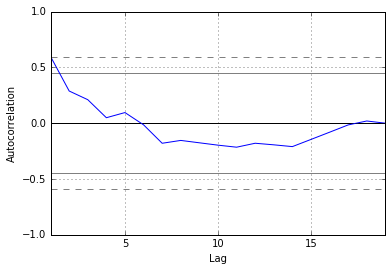

In [3]:
correlograms.autocorrelation_plot([1,2,3,3,2,1,5,6,7,10,23,345,34,34,534,534,534,345,5])
plt.show()

By definition the autocorrelation is 1 at Lag = 0.  
You can see that the autocorrelation of the sine gets lower and lower, but still has maxima at phase differences of 2 pi. It is less than unity because the functions are no longer 100% overlapping (lagging).

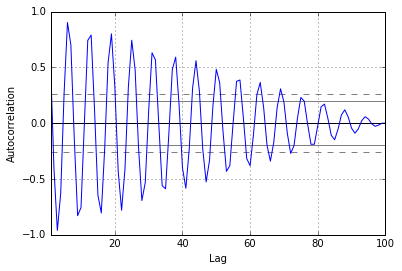

In [4]:
x = np.arange(100)
correlograms.autocorrelation_plot(np.sin(x))
plt.show()

### You can also take partial data sets!

You can take partial data sets. The smaller data set is padded with zeros, as described in Numerical Recipes 2007.

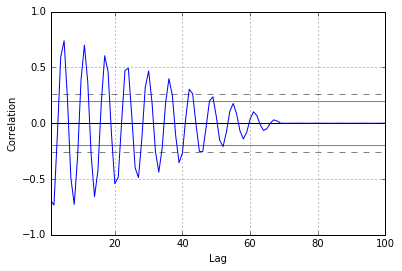

In [5]:
correlograms.crosscorrelation_plot(np.sin(x), np.cos(x[:70]))
plt.show()

The cross-correlation of random numbers and a sine show the sinoidal behaviour, but is below confidence bands, so there is probably no correlation. This is because the random numbers are greater than 0 and the sine is perfectly periodic. 

In [6]:
y = [np.random.rand() for i in range(0,100)]

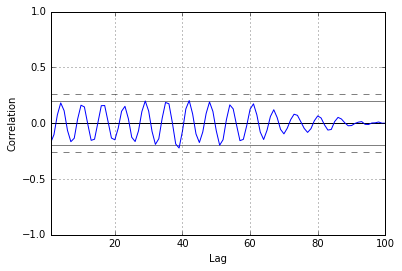

In [7]:
correlograms.crosscorrelation_plot(np.sin(x),y)

In [10]:
%load_ext watermark
%watermark -a KAVE -d -t -v -p numpy,pandas -g

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
KAVE 2016-09-01 17:16:00 

CPython 2.7.12
IPython 4.0.1

numpy 1.10.1
pandas 0.17.1
Git hash: e682a8ce36d019fff0ee6067182136550a222d07
